In [2]:
import glob
from keras.models import Sequential,load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

Using TensorFlow backend.
D:\Setups\Anaconda\Setup\envs\impulse\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Setups\Anaconda\Setup\envs\impulse\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Setups\Anaconda\Setup\envs\impulse\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Setups\Anaconda\Setup\envs\impulse\lib

In [3]:
df = pd.read_csv("Chronic_Kidney_disease.csv")
df.head(8)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd


# This Program  Classifies patients as having chronic kidney disease or not using Artificial Neural Networks

In [4]:
df.shape

(400, 26)

In [5]:
# Create a list of column names to kepp

columns_to_retain = ['sg','al','sc','hemo','pcv','wbcc','rbcc','htn','classification']

# Drop unnecessary column
df = df.drop([col for col in df.columns if not col in columns_to_retain],axis =1)

# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [6]:
# Transform the non-numeric data in columns

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform( df[column])

In [8]:
df.tail(8)

,sg,al,sc,hemo,pcv,htn,classification
392,1.020,0.0,1.2,14.8,30,0,1
393,1.025,0.0,0.7,13.0,38,0,1
394,1.020,0.0,0.8,14.1,29,0,1
395,1.020,0.0,0.5,15.7,31,0,1
396,1.025,0.0,1.2,16.5,38,0,1
397,1.020,0.0,0.6,15.8,33,0,1
398,1.025,0.0,1.0,14.2,35,0,1
399,1.025,0.0,1.1,15.8,37,0,1


In [7]:
# Split the data into independent (x) dataset (the features) and dependent (Y) dataset (the target)

X = df.drop(['classification'],axis=1)
y = df['classification']

In [8]:
X.columns

Index(['sg', 'al', 'sc', 'hemo', 'pcv', 'htn'], dtype='object')

In [9]:
# Feature Scaling
# min-max scaler method scales the dataset so that all the input features lie between 0 and 1 

x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)
X[column_names]

,sg,al,sc,hemo,pcv,htn
0,0.75,0.2,0.033898,0.836735,0.717949,1.0
1,0.75,0.8,0.016949,0.557823,0.564103,0.0
2,0.25,0.4,0.059322,0.442177,0.384615,0.0
3,0.00,0.8,0.144068,0.551020,0.410256,1.0
4,0.25,0.4,0.042373,0.578231,0.487179,0.0
...,...,...,...,...,...,...
395,0.75,0.0,0.004237,0.857143,0.794872,0.0
396,1.00,0.0,0.033898,0.911565,0.974359,0.0
397,0.75,0.0,0.008475,0.863946,0.846154,0.0
398,1.00,0.0,0.025424,0.755102,0.897436,0.0


In [10]:
# Split the data into 80% trainig and 20% testing and shuffle

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [11]:
# Build the Model
model = Sequential()
model.add( Dense(256, input_dim = len(X.columns) , kernel_initializer = k.initializers.random_normal(seed=13),activation="relu"))
model.add( Dense(1,activation = "hard_sigmoid"))


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Compile the model

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
# Train the model

history = model.fit(X_train,y_train,epochs=2000,batch_size=X_train.shape[0])
# epoch is the number of times it will loop through the dataset and batch_size is the size of samples

 1811/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1812/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1813/2000
229/229 [==============================] - 0s 10us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1814/2000
229/229 [==============================] - 0s 5us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1815/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1816/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1817/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1818/2000
229/229 [==============================] - 0s 4us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1819/2000
229/229 [==============================] - 0s 9us/step - loss: 0.0116 - accuracy: 0.9956
Epoch 1820/2000
229/229 [==============================] - 

In [21]:
# Saved the model
# model.save("ckd.model")
import pickle
with open("CKD","wb") as f:
    pickle.dump(model,f)

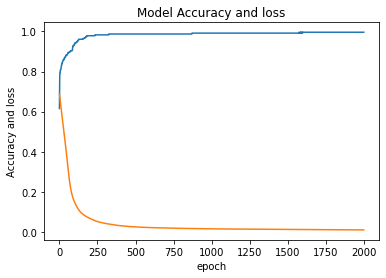

In [15]:
# Visualize the models loss and accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Model Accuracy and loss")
plt.ylabel("Accuracy and loss")
plt.xlabel("epoch")
plt.show()


In [16]:
# Get the Shape of the training and testing dataset

print("Shape of the training dataset : ",X_train.shape)
print("Shape of the testing dataset : ",X_test.shape)

Shape of the training dataset :  (229, 6)
Shape of the testing dataset :  (58, 6)


In [17]:
# Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print("Original : {0}".format(", ".join(str(x) for x in y_test)))
print()
print("Predicted : {0}".format(", ".join(str(x) for x in pred)))

Original : 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0

Predicted : 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0


In [18]:
# Show the actual values

y_test

25     0
340    1
3      0
22     0
248    0
256    1
6      0
141    0
237    0
367    1
163    0
316    1
399    1
46     0
87     0
9      0
380    1
272    1
352    1
327    1
341    1
320    1
323    1
225    0
44     0
305    1
54     0
12     0
235    0
242    0
265    1
281    1
284    1
264    1
157    0
154    0
170    0
190    0
196    0
182    0
359    1
257    1
8      0
306    1
29     0
376    1
258    1
147    0
199    0
349    1
361    1
173    0
357    1
19     0
184    0
227    0
353    1
80     0
Name: classification, dtype: int32